## 1. Introduction
In this notebook, we model stellar luminosity as a linear function of stellar mass:

$$ L̂ = w · M + b $$

The goal is to implement linear regression entirely from first principles, including:
- Loss computation
- Gradient derivation
- Gradient descent optimization
- Visualization of convergence and cost surfaces


## 2. Dataset Definition

In [1]:
# Install required libraries (run this once if needed)
%pip install numpy pandas matplotlib

  Using cached numpy-2.4.1-cp311-cp311-win_amd64.whl.metadata (6.6 kB)
  Using cached pandas-3.0.0-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.10.8-cp311-cp311-win_amd64.whl.metadata (52 kB)
  Using cached tzdata-2025.3-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.3-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp311-cp311-win_amd64.whl.metadata (116 kB)
  Using cached kiwisolver-1.4.9-cp311-cp311-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.1.0-cp311-cp311-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.3.2-py3-none-any.whl.metadata (5.8 kB)
Using cached numpy-2.4.1-cp311-cp311-win_amd64.whl (12.6 MB)
Using cached pandas-3.0.0-cp311-cp311-win_amd64.whl (9.9 MB)
Using cached matplotlib-3.10.8-cp311-cp311-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp311-cp311-win_amd64.whl (225 kB)
Using cached cycler-0.12.1-py3-n

In [2]:
import numpy as np
import matplotlib.pyplot as plt

M = np.array([0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4])
L = np.array([0.15, 0.35, 1.00, 2.30, 4.10, 7.00, 11.2, 17.5, 25.0, 35.0])

## 3. Dataset Visualization
We first visualize the relationship between stellar mass and luminosity
to evaluate whether a linear model is physically plausible.


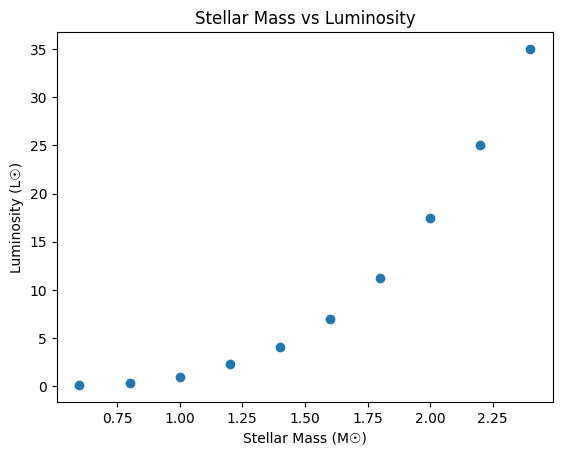

In [3]:
plt.scatter(M, L)
plt.xlabel("Stellar Mass (M☉)")
plt.ylabel("Luminosity (L☉)")
plt.title("Stellar Mass vs Luminosity")
plt.show()

## 4. Model and Loss Function
We define:
- A prediction function
- Mean Squared Error (MSE) as the loss

In [4]:
def predict(M, w, b):
    return w * M + b

def mse(y, y_hat):
    return np.mean((y - y_hat)**2)

## 5. Cost Surface Visualization
We evaluate the cost J(w, b) over a grid to visualize the loss surface.
The minimum corresponds to the optimal parameters.

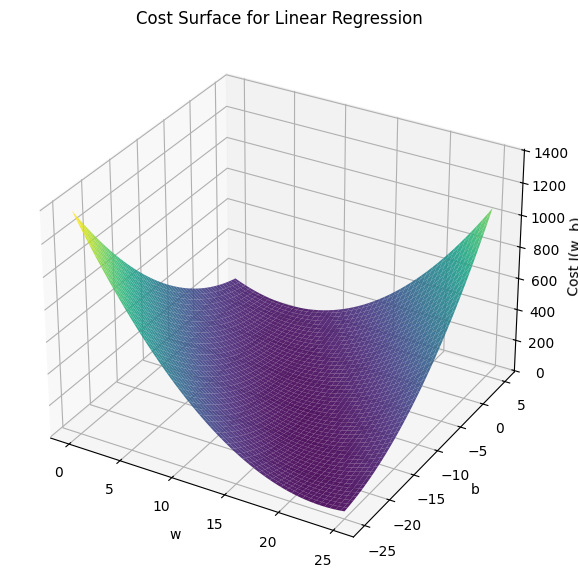

In [14]:
from mpl_toolkits.mplot3d import Axes3D

w_vals = np.linspace(0, 25, 150)
b_vals = np.linspace(-25, 5, 150)
W, B = np.meshgrid(w_vals, b_vals)

J = np.zeros_like(W)

for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        y_hat = predict(M, W[i, j], B[i, j])
        J[i, j] = mse(L, y_hat)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(W, B, J, cmap='viridis', alpha=0.9)

ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("Cost J(w, b)")
ax.set_title("Cost Surface for Linear Regression")

plt.show()

## 6. Gradient Derivation
The gradients of the MSE loss are:

$$\frac{∂J}{∂w} = \frac{2}{N} Σ (L̂ᵢ − Lᵢ) Mᵢ$$
  
$$\frac{∂J}{∂b} = \frac{2}{N} Σ (L̂ᵢ − Lᵢ)$$

## 7. Gradient Descent (Non-Vectorized)

In [6]:
def gradients_loop(M, L, w, b):
    dw, db = 0.0, 0.0
    N = len(M)
    for i in range(N):
        y_hat = w * M[i] + b
        error = y_hat - L[i]
        dw += error * M[i]
        db += error
    return (2/N) * dw, (2/N) * db

## 8. Gradient Descent (Vectorized)

In [7]:
def gradients_vectorized(M, L, w, b):
    y_hat = predict(M, w, b)
    error = y_hat - L
    dw = (2/len(M)) * np.dot(error, M)
    db = (2/len(M)) * np.sum(error)
    return dw, db

## 9. Training and Convergence

In [8]:
def train(M, L, lr, epochs):
    w, b = 0.0, 0.0
    losses = []

    for _ in range(epochs):
        dw, db = gradients_vectorized(M, L, w, b)
        w -= lr * dw
        b -= lr * db
        losses.append(mse(L, predict(M, w, b)))

    return w, b, losses

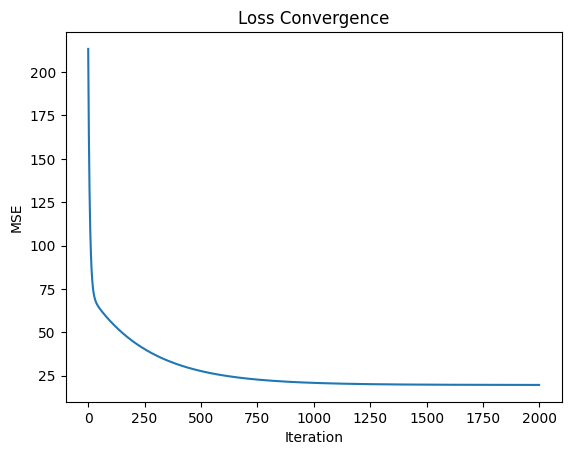

In [9]:
w, b, losses = train(M, L, lr=0.01, epochs=2000)

plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("Loss Convergence")
plt.show()

## 10. Learning Rate Experiments

In [18]:
for lr in [0.001, 0.01, 0.05]:
    w, b, losses = train(M, L, lr, 2000)
    print(f"LR={lr}: w={w:.3f}, b={b:.3f}, loss={losses[-1]:.3f}")

LR=0.001: w=9.716, b=-2.894, loss=44.696
LR=0.01: w=17.853, b=-16.376, loss=19.618
LR=0.05: w=18.130, b=-16.835, loss=19.590


## 11. Final fit visualization

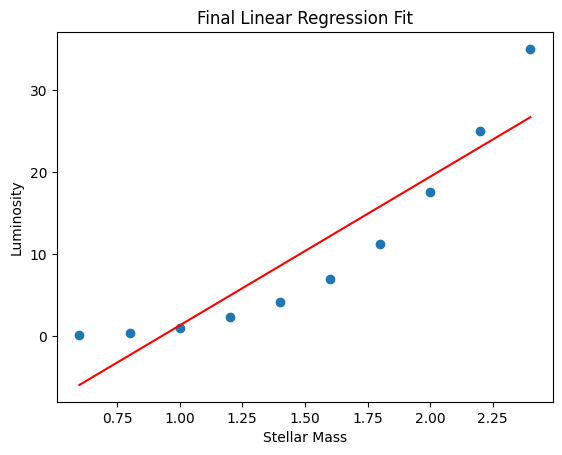

In [11]:
plt.scatter(M, L)
plt.plot(M, predict(M, w, b), color="red")
plt.xlabel("Stellar Mass")
plt.ylabel("Luminosity")
plt.title("Final Linear Regression Fit")
plt.show()

## Conclusion
 **1. astrophysical meaning of w:**
- The parameter w represents how strongly luminosity increases with mass.

**2. Why is a linear model limited here?**
- A linear model is limited because stellar luminosity increases nonlinearly,
  approximately following a power law on the main sequence.

Linear regression successfully learns a global trend between stellar mass and
luminosity and converges reliably due to the convex nature of the loss function.
However, the model exhibits systematic errors caused by its inability to
represent the strongly nonlinear mass–luminosity relationship. These limitations
motivate the use of nonlinear and interaction features in Part II.
